# Analisi dei dati raccolti

## Setup

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [38]:
def plotter(dataframes: list, index: str, names: list, space: int) -> None:
    xvalues_int = list()
    xvalues_str = list()
    for name in names:
        xvalues_str.extend(["", name, ""])

    plt.gcf().set_size_inches(10, 6)
    plt.title("Generazione" if "A" in index else "Verifica")
    plt.ylabel("Tempo di esecuzione")
    
    start = 1
    ymax = 0
    for dataframe in dataframes:
        series = dataframe[index]
        ymax = max(ymax, max(series))
        x = [start, start+1, start+2]
        xvalues_int.extend(x)
        plt.bar(x, [series.min(), series.mean(), series.max()])
        start += 5
    
    plt.xticks(xvalues_int, xvalues_str, rotation=90)
    plt.yticks([i for i in range(0, ymax+space, space)])
    plt.grid(axis="y")
    
    plt.show()

In [39]:
PATH = "../asconprfav12/data/{}.csv"

IMPLEMENTATIONS = [
    "armv6m", "bi32", "bi32_armv6m", "bi32_lowreg", "opt32", "ref"
]

armv6m = pd.read_csv(open(PATH.format("armv6m"), "r"), delimiter=";")
bi32 = pd.read_csv(open(PATH.format("bi32"), "r"), delimiter=";")
bi32_armv6m = pd.read_csv(open(PATH.format("bi32_armv6m"), "r"), delimiter=";")
bi32_lowreg = pd.read_csv(open(PATH.format("bi32_lowreg"), "r"), delimiter=";")
opt32 = pd.read_csv(open(PATH.format("opt32"), "r"), delimiter=";")
ref = pd.read_csv(open(PATH.format("ref"), "r"), delimiter=";")

DATAFRAMES = [
    armv6m, bi32, bi32_armv6m, bi32_lowreg, opt32, ref
]

## Grafici

Ogni grafico presente in questo notebook è suddiviso in sei parti, ognuna delle quali contiene una rappresentazione dei dati raccolti durante il testing in fase di generazione o verifica del tag di una data implementazione

Le implementazioni, che vanno a indicizzare l'asse delle X, vengono rappresentate da tre barre:
* la barra di sinistra rappresenta il valore **minimo**
* la barra centrale rappresenta il valore **medio**
* la barra di destra rappresenta il valore **massimo**

I valori sull'asse Y rappresentano il tempo di esecuzione in **microsecondi**

### PT vuoto

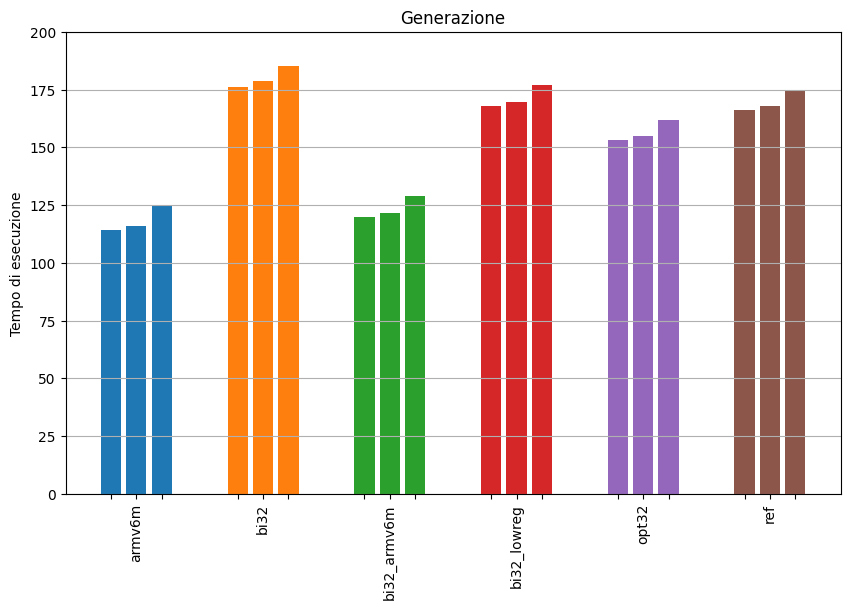

In [40]:
# Generazione tag
plotter(DATAFRAMES, "0B-A", IMPLEMENTATIONS, 25)

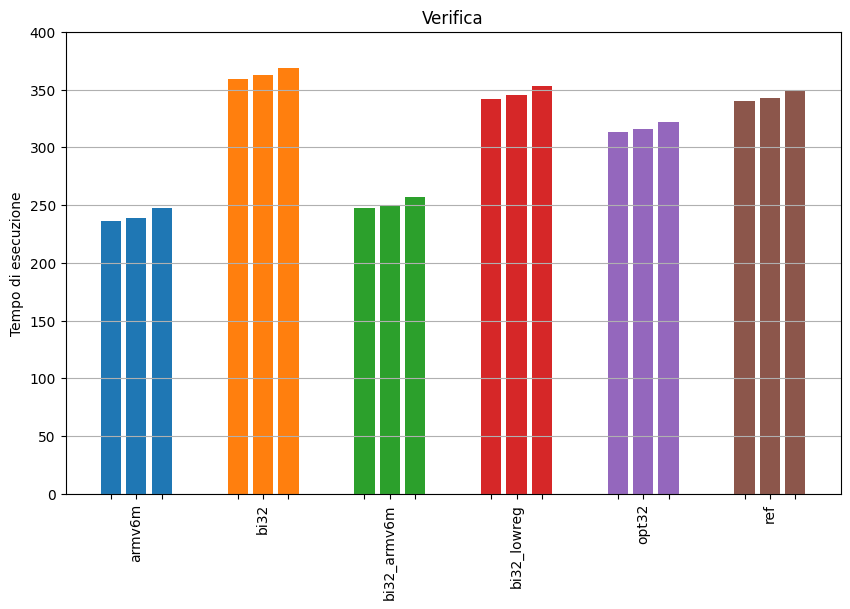

In [41]:
# Verifica tag
plotter(DATAFRAMES, "0B-V", IMPLEMENTATIONS, 50)

### PT 8 byte

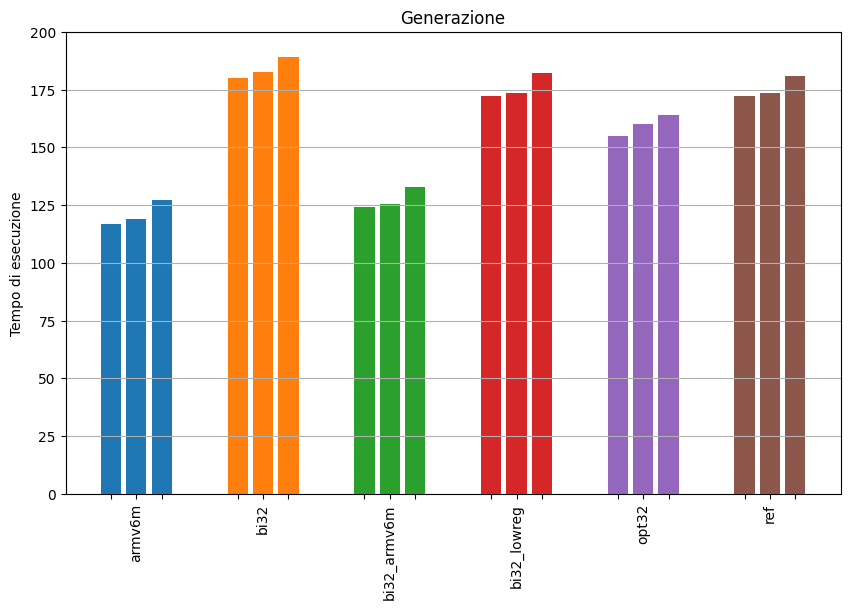

In [42]:
# Generazione tag
plotter(DATAFRAMES, "8B-A", IMPLEMENTATIONS, 25)

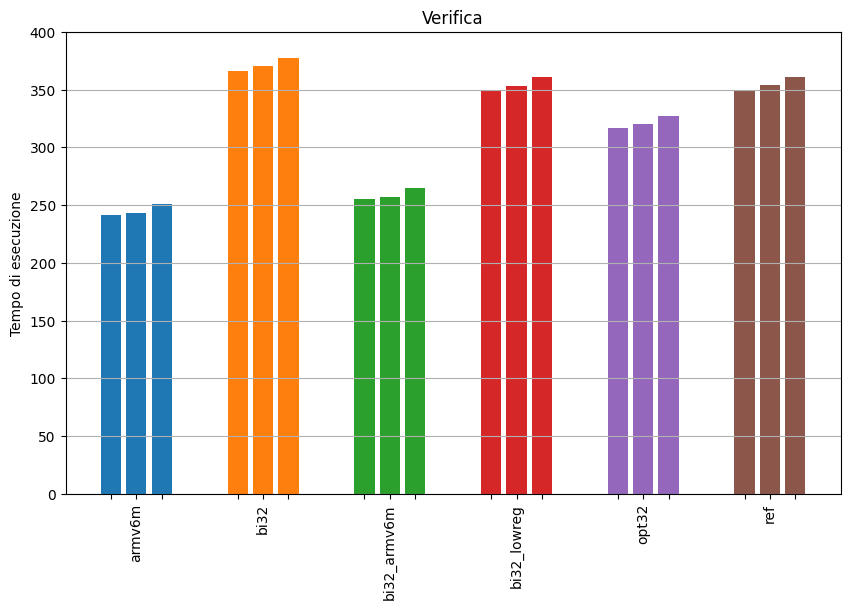

In [43]:
# Verifica tag
plotter(DATAFRAMES, "8B-V", IMPLEMENTATIONS, 50)

### PT 16 byte

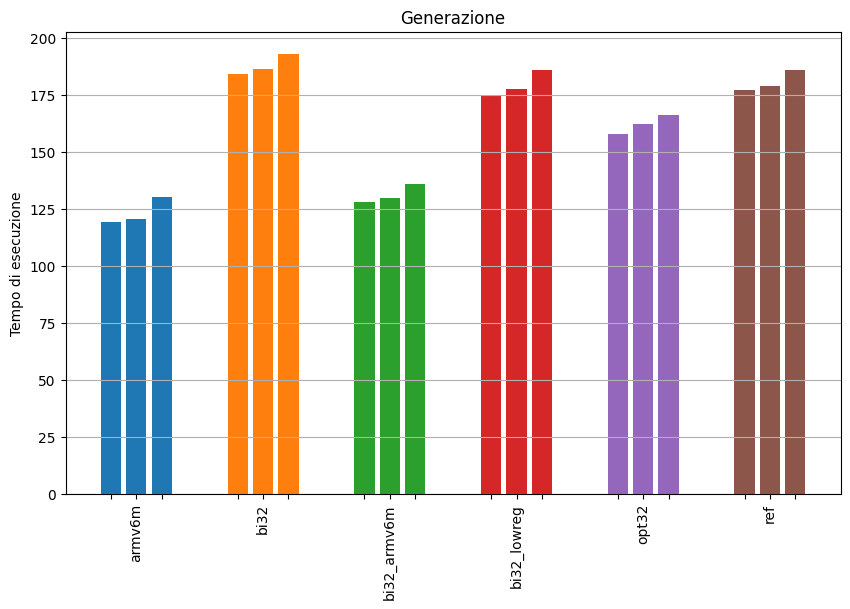

In [44]:
# Generazione tag
plotter(DATAFRAMES, "16B-A", IMPLEMENTATIONS, 25)

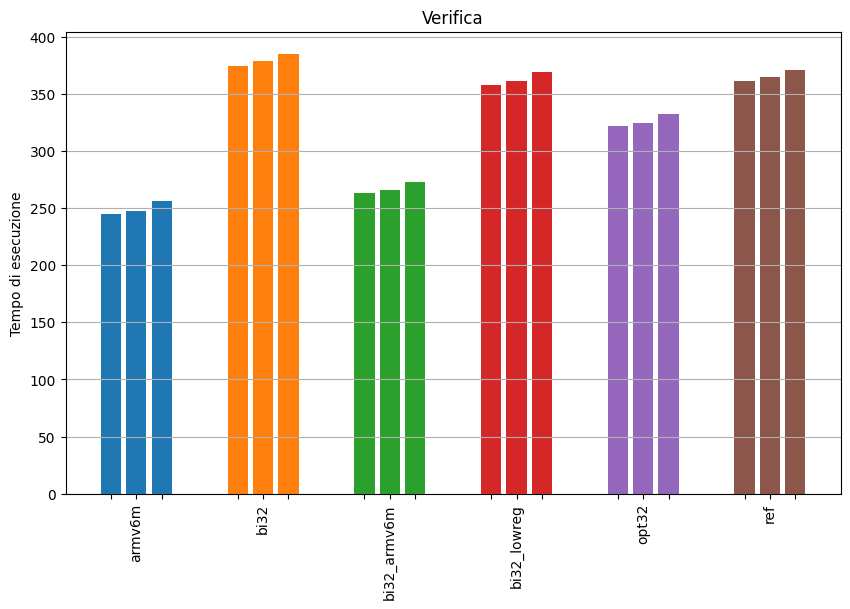

In [45]:
# Verifica tag
plotter(DATAFRAMES, "16B-V", IMPLEMENTATIONS, 50)

### PT 32 byte

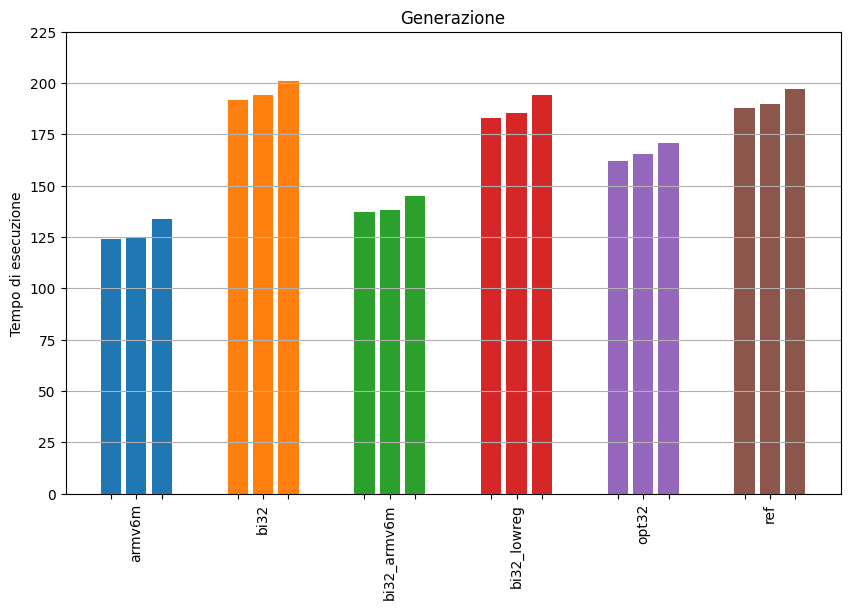

In [46]:
# Generazione tag
plotter(DATAFRAMES, "32B-A", IMPLEMENTATIONS, 25)

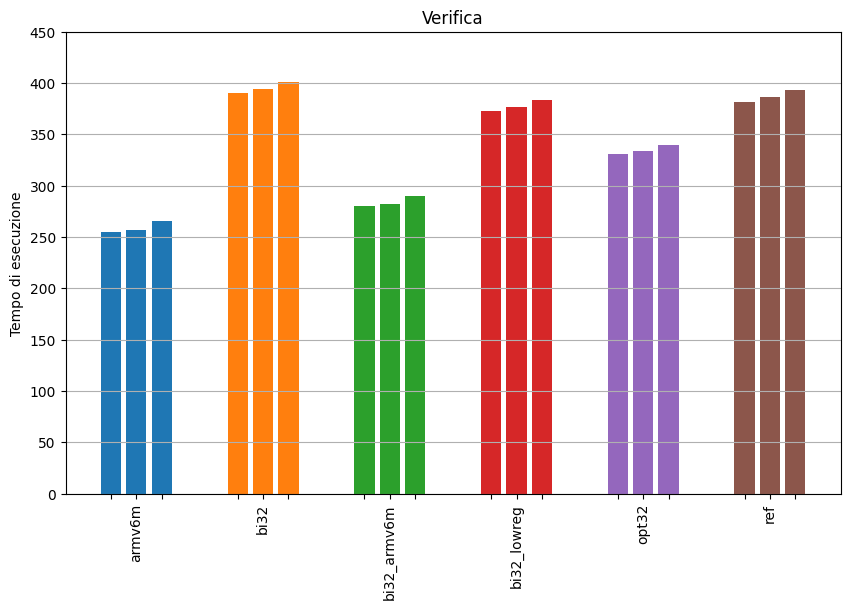

In [47]:
# Verifica tag
plotter(DATAFRAMES, "32B-V", IMPLEMENTATIONS, 50)

### PT 64 byte

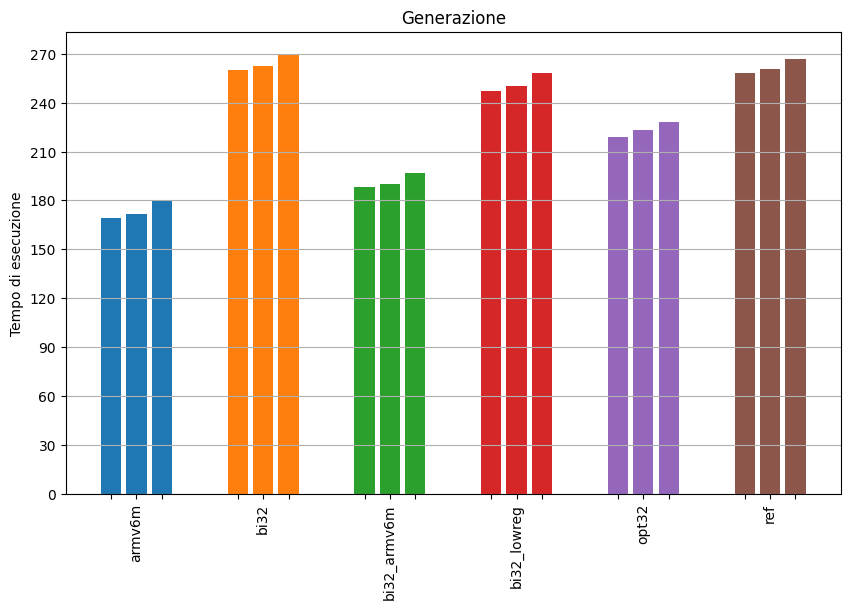

In [48]:
# Generazione tag
plotter(DATAFRAMES, "64B-A", IMPLEMENTATIONS, 30)

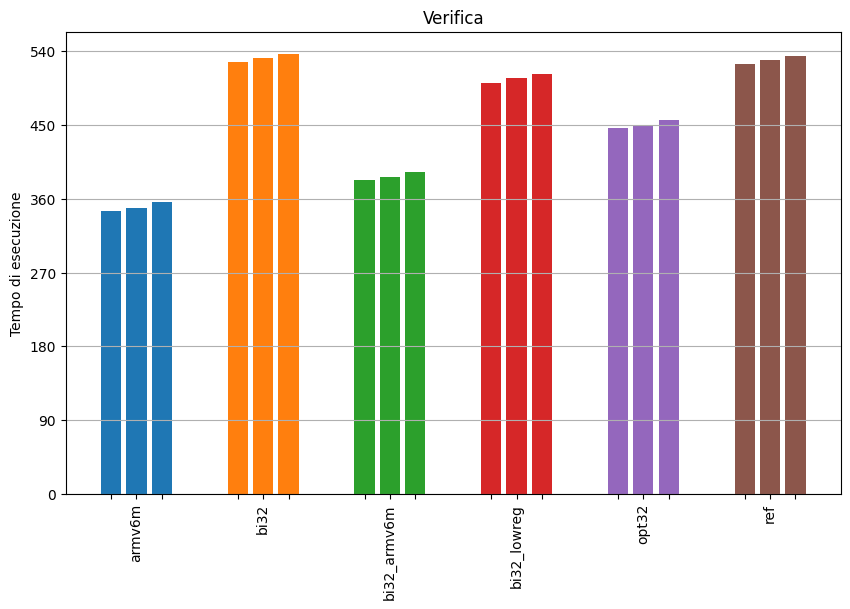

In [49]:
# Verifica tag
plotter(DATAFRAMES, "64B-V", IMPLEMENTATIONS, 90)

### PT 128 byte

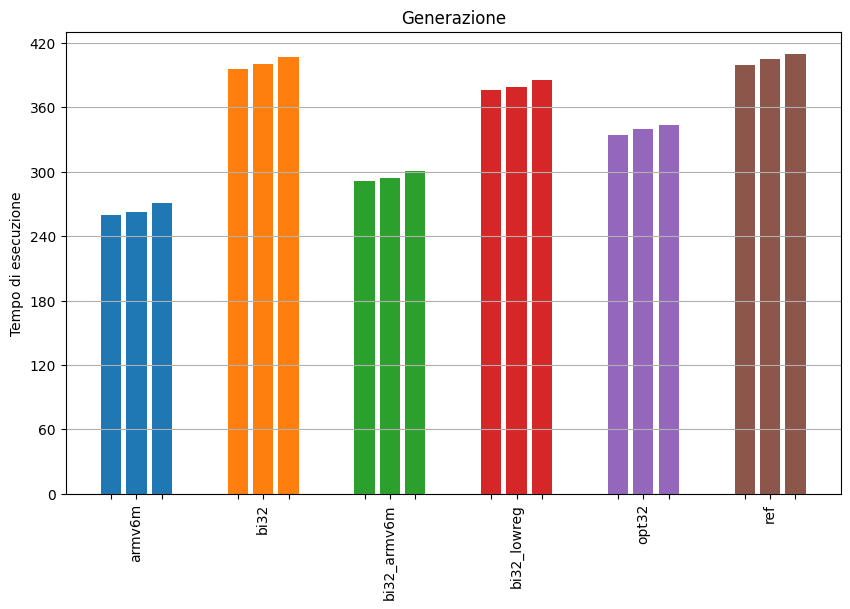

In [50]:
# Generazione tag
plotter(DATAFRAMES, "128B-A", IMPLEMENTATIONS, 60)

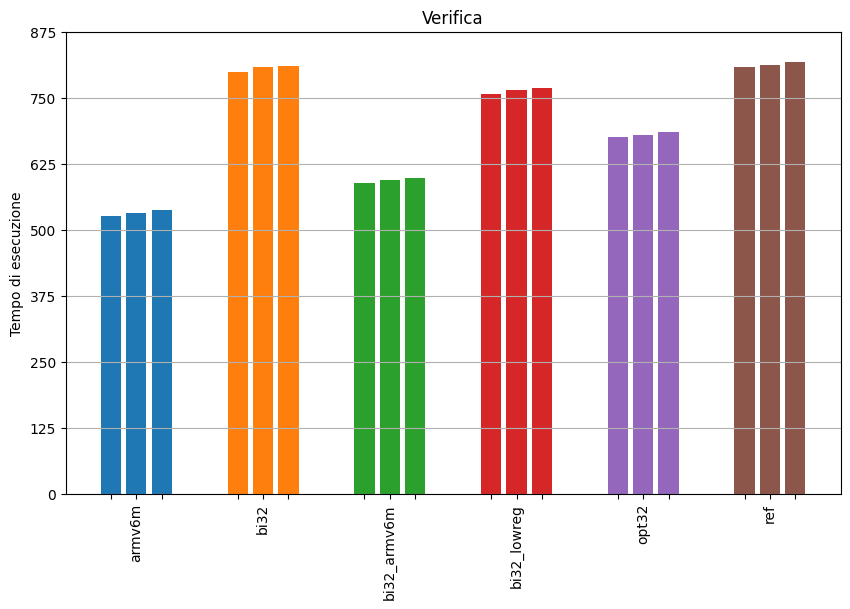

In [51]:
# Verifica tag
plotter(DATAFRAMES, "128B-V", IMPLEMENTATIONS, 125)

### PT 256 byte

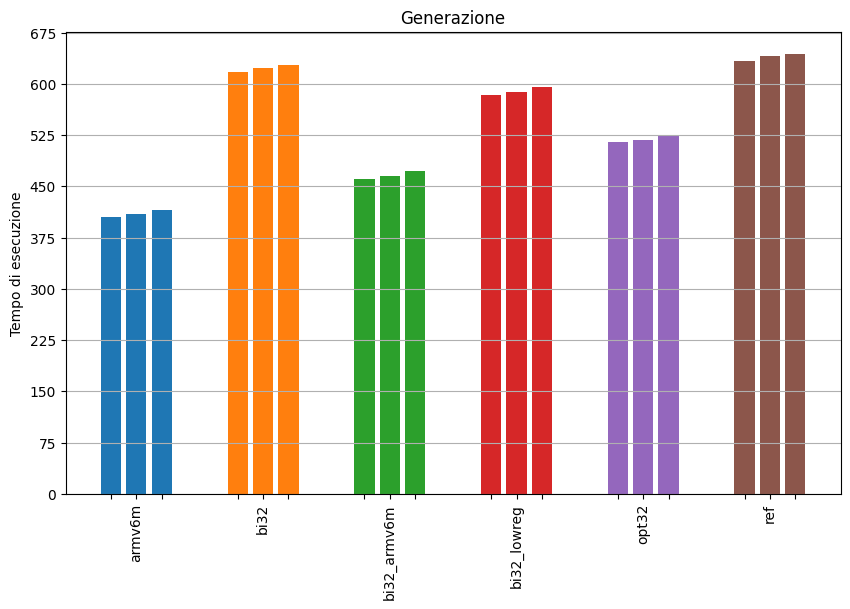

In [52]:
# Generazione tag
plotter(DATAFRAMES, "256B-A", IMPLEMENTATIONS, 75)

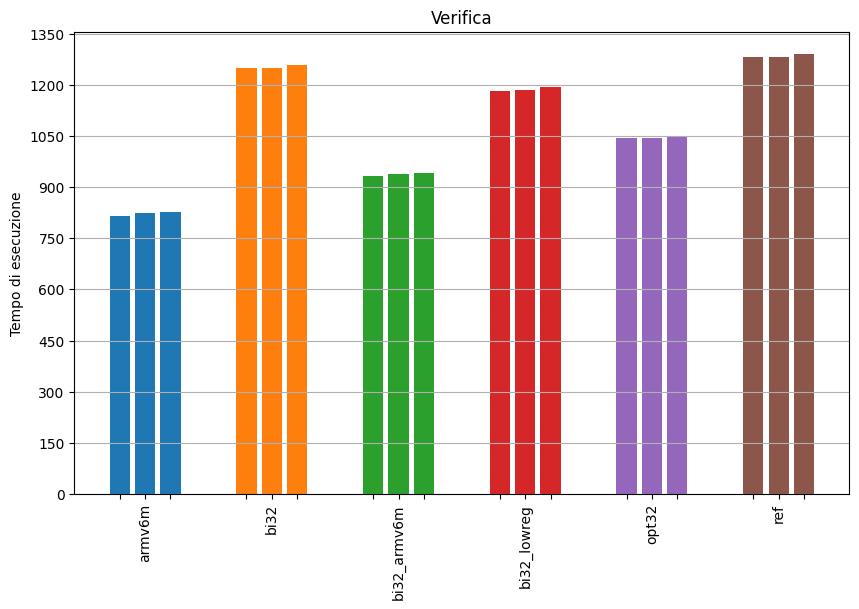

In [53]:
# Verifica tag
plotter(DATAFRAMES, "256B-V", IMPLEMENTATIONS, 150)

### PT 512 byte

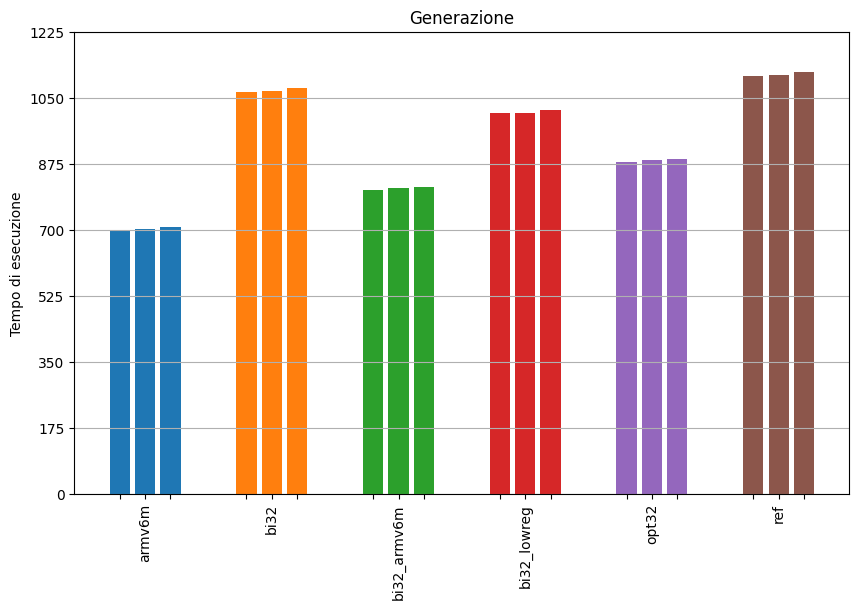

In [54]:
# Generazione tag
plotter(DATAFRAMES, "512B-A", IMPLEMENTATIONS, 175)

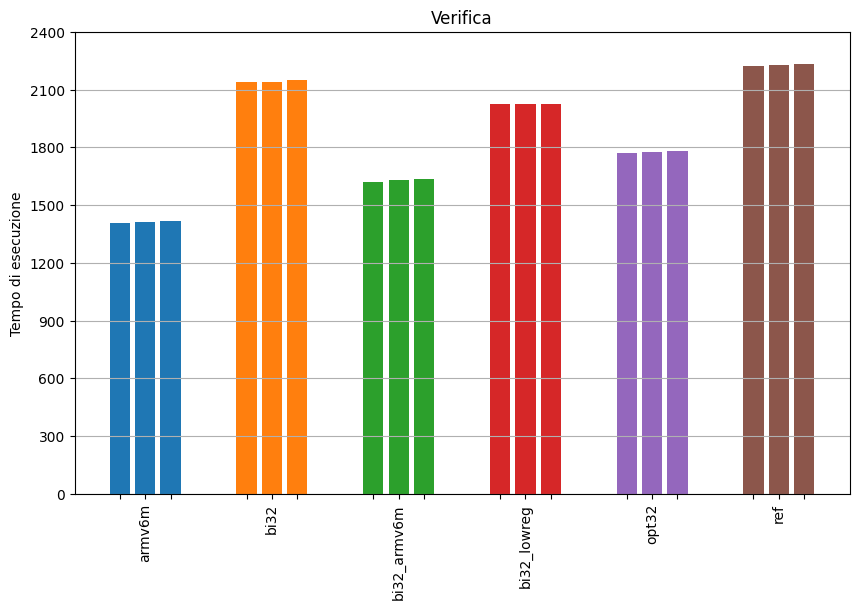

In [55]:
# Verifica tag
plotter(DATAFRAMES, "512B-V", IMPLEMENTATIONS, 300)

### PT 1024 byte

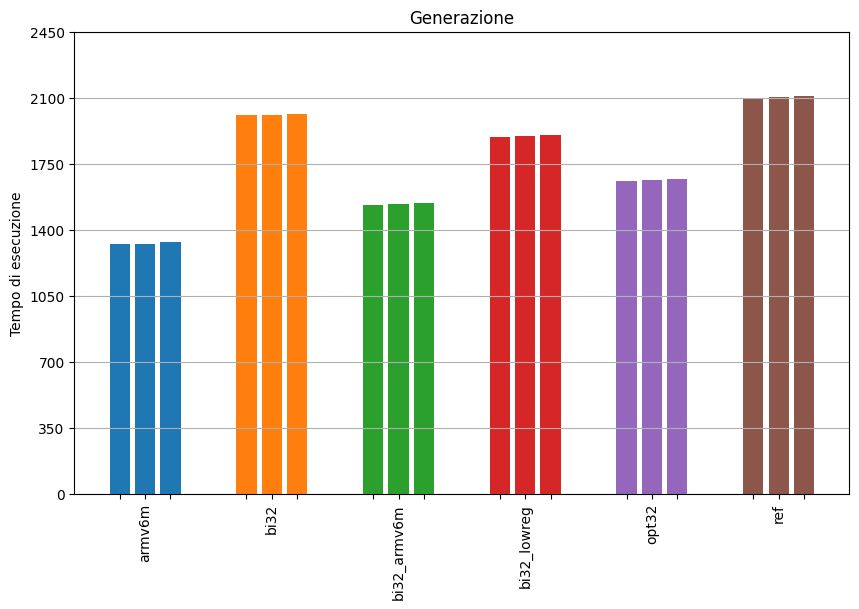

In [56]:
# Generazione tag
plotter(DATAFRAMES, "1024B-A", IMPLEMENTATIONS, 350)

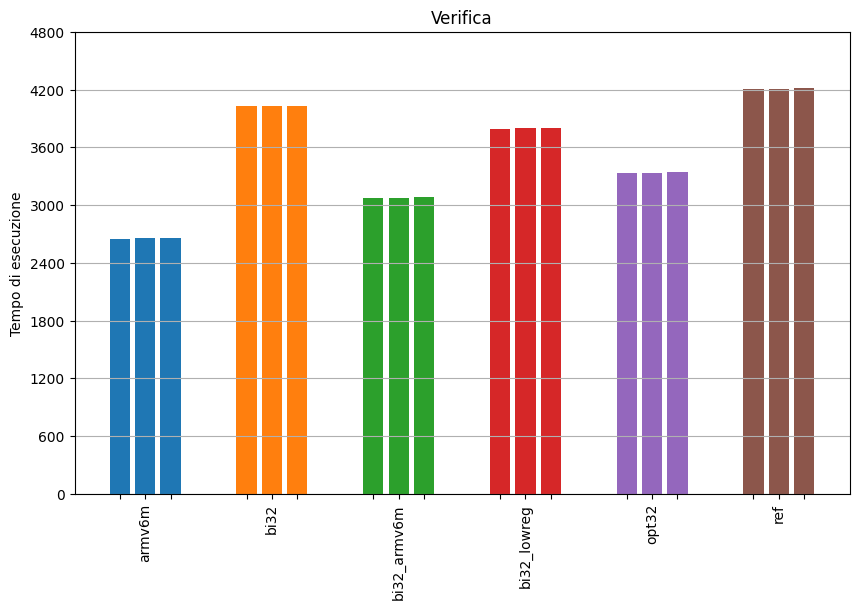

In [57]:
# Verifica tag
plotter(DATAFRAMES, "1024B-V", IMPLEMENTATIONS, 600)

## Conclusioni

### Migliori prestazioni

L'implementazione che ha ottenuto i tempi di esecuzione migliori in ogni possibile grandezza di PT considerata è la `armv6m`, seguita dalle implementazioni `bi32_armv6m` e `opt32`

Notiamo come le due migliori implementazioni sono ottimizzate per architetture ARMv6-M, mentre la terza è ottimizzata per architetture $32$ bit generiche

### Peggiori prestazioni

Considerando PT di grandezza $0$, $8$, $16$, $32$ e $64$ byte, l'implementazione peggiore è la `bi32`, seguita dalle implementazioni `ref` e `bi32_lowreg`

Considerando invece PT di grandezza $128$, $256$, $512$ e $1024$ byte, le prime due posizioni si invertono

Notiamo come le implementazioni peggiori sono quelle ottimizzate per architetture $32$ bit generiche (`bi32` e `bi32_lowreg`) e quella priva di ottimizzazioni (`ref`)

### Dimensioni eseguibile

L'implementazione `armv6m`, oltre ad essere la migliore nei tempi di esecuzione, si conferma la migliore anche nelle dimensioni dell'eseguibile, occupando circa il $6/7$\% dello spazio disponibile

Troviamo poi le implementazioni `bi32_armv6m` e `bi32_lowreg`, che occupano leggermente di più della `armv6m` ma rimangono comunque sui $6/7$ punti percentuali

Le due implementazioni peggiori sono `ref` e `opt32`, che occupano circa il $12/13$\% dello spazio disponibile